# Pride and Prejudice and Sense and Sensibility Data Analysis!

<img src="https://images.unsplash.com/photo-1573125716783-d05b57a86488?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2940&q=80"  width="50%" height="20%">

*Data analysis project on Jane Austen's classic novels "Sense and Sensibility" (1811) and "Pride and Prejudice" (1813) to explore how Austen's writing might have changed between the two novels.*



## *Requirement:* Annotate my code with markdown cells. 
*(I'll try to include clear markdown notes throughout the notebook!)*

To begin, we'll first install the necessary packages:

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandasql as ps
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk


## *Requirement:* Read in TWO text data sources (in any format). For example, email chains or different pages from a book.

I will start by reading in the two Jane Austen books from project gutenberg: **"Sense and Sensibility"**  and **"Pride and Prejudice"**

In [19]:
url_sense = "https://www.gutenberg.org/files/21839/21839-0.txt"
url_pride = "https://www.gutenberg.org/files/1342/1342-0.txt"

response_sense = requests.get(url_sense)
response_pride = requests.get(url_pride)

if response_sense.status_code == 200 and response_pride.status_code == 200:
    sense_data = response_sense.text
    pride_data = response_pride.text

Next I am splitting these books that have just been pulled in from project gutenberg by their words.

In [78]:
sense_words = sense_data.split()

pride_words = pride_data.split()

Next, we'll make 2 series that will have the words extracted from the two texts.

In [79]:
sense_series = pd.Series(sense_words, name="Sense and Sensibility")
pride_series = pd.Series(pride_words, name="Pride and Prejudice")


Now I'll make two data frames from these series with word counts

In [80]:
sense_df = pd.DataFrame(sense_series.value_counts().reset_index())
pride_df = pd.DataFrame(pride_series.value_counts().reset_index())

## *Requirement:* Clean your data and perform a SQL join with your data sets using either plain sql or the pandasql Python library


I'll rename the columns in these newly created data frames and then perform a merge on the 'word' column that I'm making. I'll preview it after to make sure it looks okay.

In [81]:
# Rename columns 
sense_df.columns = ['Word', 'Count_Sense']
pride_df.columns = ['Word', 'Count_Pride']

# merge based on 'Word' column
merged_df = pd.merge(sense_df, pride_df, on="Word", how="outer")

# Fill NaN values with 0
merged_df.fillna(0, inplace=True)

print(merged_df.head())

  Word  Count_Sense  Count_Pride
0  the       4157.0       4509.0
1   to       4140.0       4275.0
2   of       3768.0       3897.0
3  and       3373.0       3443.0
4  her       2180.0       1905.0


Next I will clean the data some by **chunking all these words by sentences**. I'll look for normal sentence endings like "!,?,." to make sense of where each sentence starts and stops.

I'll do this for both books.

In [82]:
sentences_sense = re.split(r'\. |\? |\! ', sense_data)  
sentences_pride = re.split(r'\. |\? |\! ', pride_data) 

Next, I'd like to calcultate the **word counts for the different sentences** in both books.

In [83]:
sentence_word_counts_sense = [len(sentence.split()) for sentence in sentences_sense]
sentence_word_counts_pride = [len(sentence.split()) for sentence in sentences_pride]

Now to calculate **cumulative word counts**, this will help with later tracking sentences in chapters.

In [85]:
cumulative_word_counts_sense = [sum(sentence_word_counts_sense[:i+1]) for i in range(len(sentence_word_counts_sense))]
cumulative_word_counts_pride = [sum(sentence_word_counts_pride[:i+1]) for i in range(len(sentence_word_counts_pride))]

Next I'd like to **make columns** for this sentence data in the data frames I've already made. 

In [86]:
  # Add sentence nd cumulative word counts 
sense_data_df = pd.DataFrame({
        "Sentence": sentences_sense,
        "Word_Count": cumulative_word_counts_sense
    
    })

pride_data_df = pd.DataFrame({
        "Sentence": sentences_pride,
        "Word_Count": cumulative_word_counts_pride
      
    })

Next, I will calculate **total word counts** for each novel. 

In [87]:
print("Total word count for Sense and Sensibility:", total_word_count_sense)
print("Total word count for Pride and Prejudice:", total_word_count_pride)


Total word count for Sense and Sensibility: 124978
Total word count for Pride and Prejudice: 130416


They're pretty close to the same length of novel then. Pride and Prejudice is a little longer.

I wonder how many **'unique' words are in each book**? What words were used in one novel and not the other? 

In [88]:
# unique word count for each book
unique_word_count_sense = len(set(sense_words))
unique_word_count_pride = len(set(pride_words))

# Create a sets for both
unique_sense_words = set(sense_words)
unique_pride_words = set(pride_words)

# Convert sets to lists
unique_sense_words_list = list(unique_sense_words)
unique_pride_words_list = list(unique_pride_words)

print("Number of unique words in Sense and Sensibility:", len(unique_sense_words_list))
print("Number of unique words in Pride and Prejudice:", len(unique_pride_words_list))

Number of unique words in Sense and Sensibility: 14287
Number of unique words in Pride and Prejudice: 14708


I wonder what the **average word length** is for both novel?

In [32]:
# Calculate average word length for each book
average_word_length_sense = sum(len(word) for word in sense_words) / total_word_count_sense
average_word_length_pride = sum(len(word) for word in pride_words) / total_word_count_pride

# Print the average word length for each book
print("Average word length for Sense and Sensibility:", average_word_length_sense)
print("Average word length for Pride and Prejudice:", average_word_length_pride)


Average word length for Sense and Sensibility: 4.651562675030806
Average word length for Pride and Prejudice: 4.726758986627408


Also nearly the same! Average word length in both novels is about 4-5 letters.

Now I'd like to see **what words are most common** in both novels. I'll need to calculate word frequency.

In [56]:
# word frequency 
word_frequency_sense = Counter(sense_words)
word_frequency_pride = Counter(pride_words)

print("Sense and Sensibility Word Frequency:")
print(word_frequency_sense.most_common(10))

print("\nPride and Prejudice Word Frequency:")
print(word_frequency_pride.most_common(10))

Sense and Sensibility Word Frequency:
[('the', 4157), ('to', 4140), ('of', 3768), ('and', 3373), ('her', 2180), ('a', 2099), ('in', 1963), ('was', 1792), ('I', 1699), ('she', 1281)]

Pride and Prejudice Word Frequency:
[('the', 4509), ('to', 4275), ('of', 3897), ('and', 3443), ('a', 2021), ('in', 1923), ('her', 1905), ('was', 1817), ('I', 1764), ('that', 1458)]


let me try to remove these filler words.

In [74]:
custom_stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

# word frequency 
word_frequency_sense = Counter(word for word in sense_words if word.lower() not in custom_stop_words)
word_frequency_pride = Counter(word for word in pride_words if word.lower() not in custom_stop_words)

# Print top 10
print("Sense and Sensibility Word Frequency:")
print(word_frequency_sense.most_common(10))

print("\nPride and Prejudice Word Frequency:")
print(word_frequency_pride.most_common(10))

Sense and Sensibility Word Frequency:
[('could', 553), ('Mrs.', 531), ('would', 503), ('every', 357), ('Elinor', 352), ('said', 346), ('must', 289), ('much', 258), ('Marianne', 256), ('one', 251)]

Pride and Prejudice Word Frequency:
[('Mr.', 788), ('could', 503), ('would', 468), ('Elizabeth', 395), ('Mrs.', 346), ('said', 341), ('must', 312), ('Miss', 302), ('much', 298), ('â\x80\x9cI', 298)]


## *Requirement:* 3 matplotlib or seaborn visualizations

*These are all stylized less for readability and more for fun to go with the theme of the Austen novels*

I'll now make a bar chart for total unique words and total words. We can see there's not a very large unique word count. 

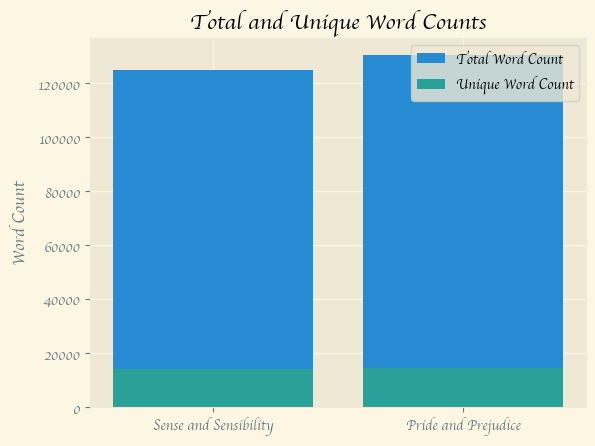

In [91]:
plt.style.use("Solarize_Light2")

fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [total_word_count_sense, total_word_count_pride], label='Total Word Count')
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [unique_word_count_sense, unique_word_count_pride], label='Unique Word Count')
ax.set_ylabel('Word Count')
ax.legend()
plt.title('Total and Unique Word Counts')
plt.show()

It looks like close to the same for both novels. Maybe the unque count has to do with the unique characters/places an not so mucht the author's vocabulary/style changing

I'll now make a bar chart for average word length betwen the two books.

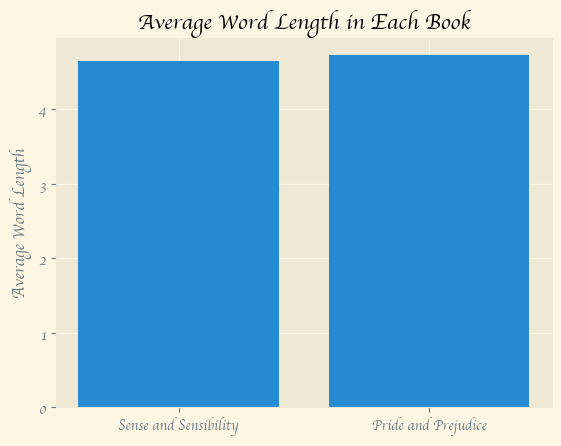

In [92]:
plt.style.use("Solarize_Light2")


fig, ax = plt.subplots()
ax.bar(["Sense and Sensibility", "Pride and Prejudice"], [average_word_length_sense, average_word_length_pride])
ax.set_ylabel('Average Word Length')
plt.title('Average Word Length in Each Book')
plt.show()

Both books have an average word size of about 4 to 5 letters.

I will now make a line chart. showing the increase in word counts as both books progress to their ends. 

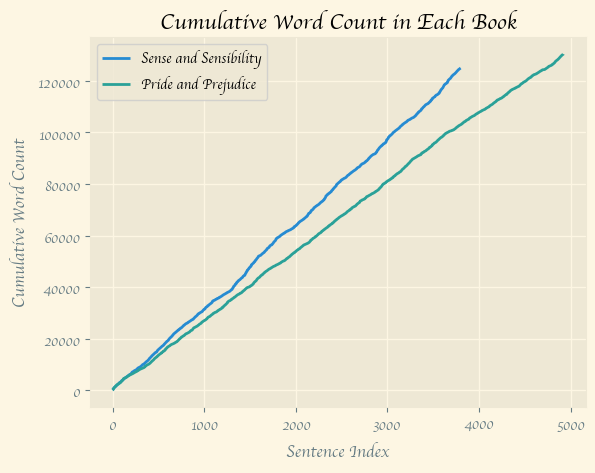

In [41]:
plt.style.use("Solarize_Light2")

# Create line chart for cumulative word count
fig, ax = plt.subplots()
ax.plot(sense_data_df['Word_Count'], label='Sense and Sensibility')
ax.plot(pride_data_df['Word_Count'], label='Pride and Prejudice')
ax.set_xlabel('Sentence Index')
ax.set_ylabel('Cumulative Word Count')
ax.legend()
plt.title('Cumulative Word Count in Each Book')
plt.show()

I'd now like to do a pie chart of most common words in both novels. 

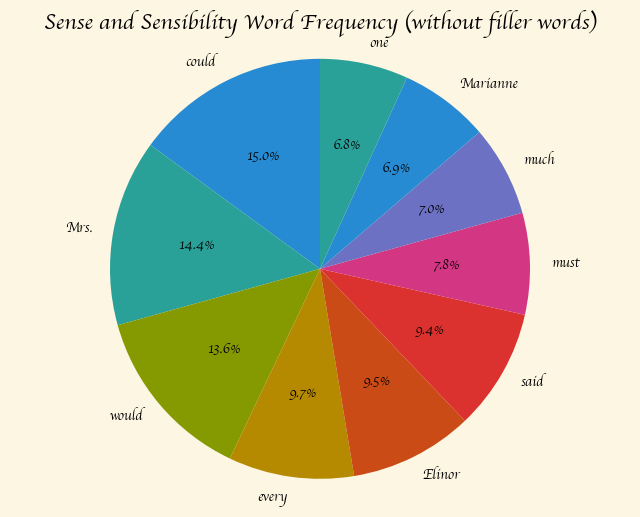

/Users/natalyanaser/Desktop/coding/project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/natalyanaser/Desktop/coding/project/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


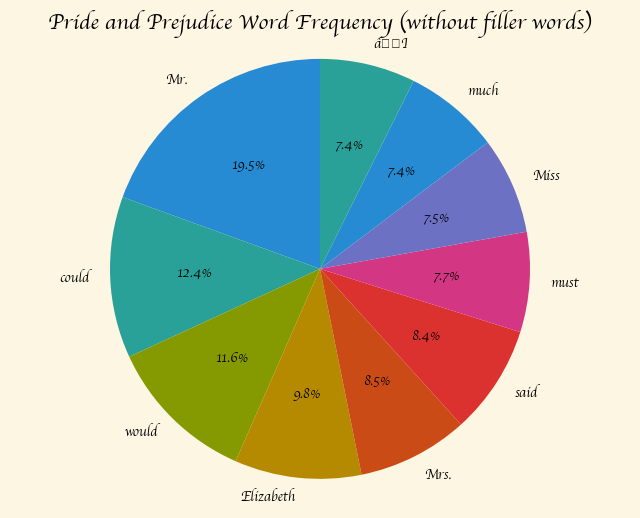

In [93]:
# 10 most common words 
most_common_sense = word_frequency_sense.most_common(10)
most_common_pride = word_frequency_pride.most_common(10)

labels_sense = [word[0] for word in most_common_sense]
sizes_sense = [word[1] for word in most_common_sense]

labels_pride = [word[0] for word in most_common_pride]
sizes_pride = [word[1] for word in most_common_pride]

# Sense and Sensibility
plt.figure(figsize=(8, 6))
plt.pie(sizes_sense, labels=labels_sense, autopct='%1.1f%%', startangle=90)
plt.title("Sense and Sensibility Word Frequency (without filler words)")
plt.axis('equal')
plt.show()

# Pride and Prejudice
plt.figure(figsize=(8, 6))
plt.pie(sizes_pride, labels=labels_pride, autopct='%1.1f%%', startangle=90)
plt.title("Pride and Prejudice Word Frequency (without filler words)")
plt.axis('equal')
plt.show()